# Load dataset

**record name , balanced sample**
- record 04015 -> 400
- record 04043 -> 1000
- record 04048 -> 900
- record 04908 -> tidak bisa di split karena hanya AF
- record 04936 -> 2000
- record 05091 -> 1000, class 0 29
- record 05121 -> 1000, class 0, 150
- record 05261 -> 1000, class 0 105
- record 06426 -> 2000
- record 06453 -> 300
- record 06995 -> 900
- record 07910 -> 320
- record 08215 -> 400
- record 08219 -> 5000
- record 08378 -> 220
- record 08455 -> 90

In [1]:
import os

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
    if filename.find('sequence') > -1 :
        filenames.append(filename)

- Change this parameter

In [2]:
record = "08455"
n_samples = 90

In [3]:
filenames

['AFDB_04015_sequence_300_pt_2_ch.csv',
 'AFDB_04043_sequence_300_pt_2_ch.csv',
 'AFDB_04048_sequence_300_pt_2_ch.csv',
 'AFDB_04126_sequence_300_pt_2_ch.csv',
 'AFDB_04908_sequence_300_pt_2_ch.csv',
 'AFDB_04936_sequence_300_pt_2_ch.csv',
 'AFDB_05091_sequence_300_pt_2_ch.csv',
 'AFDB_05121_sequence_300_pt_2_ch.csv',
 'AFDB_05261_sequence_300_pt_2_ch.csv',
 'AFDB_06426_sequence_300_pt_2_ch.csv',
 'AFDB_06453_sequence_300_pt_2_ch.csv',
 'AFDB_06995_sequence_300_pt_2_ch.csv',
 'AFDB_07910_sequence_300_pt_2_ch.csv',
 'AFDB_08215_sequence_300_pt_2_ch.csv',
 'AFDB_08219_sequence_300_pt_2_ch.csv',
 'AFDB_08378_sequence_300_pt_2_ch.csv',
 'AFDB_08455_sequence_300_pt_2_ch.csv']

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

- Split Dataset

In [5]:
ecg_df = pd.read_csv(dataset_folder + 'AFDB_%s_sequence_300_pt_2_ch.csv' % record, header=None)

In [6]:
ecg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,-0.038797,0.006004,0.033775,-0.013553,-0.034368,0.026976,0.056766,0.023550,-0.004927,0.029403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.189168,0.317376,0.542245,0.762157,0.873074,0.838696,0.661431,0.387234,0.100767,-0.132667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.355577,0.489005,0.704601,0.907997,0.917721,0.699885,0.421409,0.208080,-0.012714,-0.175675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.354691,0.527235,0.767407,0.939707,0.925572,0.703208,0.432279,0.202279,-0.035209,-0.176176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.332370,0.501606,0.728808,0.888163,0.885305,0.700870,0.431619,0.164636,-0.090423,-0.217445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


In [7]:
X = ecg_df.iloc[:,:600].values
    
y = ecg_df.iloc[:,600].values

le = LabelEncoder()
le.fit(y)

labels = le.classes_
print(" categorical label : ", labels)

y = le.transform(y)

 categorical label :  ['AF' 'N']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.33, random_state=42)

In [9]:
train_df = pd.DataFrame(np.hstack((X_train, np.expand_dims(y_train, 1))))
test_df = pd.DataFrame(np.hstack((X_test, np.expand_dims(y_test, 1))))

- 1 sequence terdiri dari 600 titik data , kolom terakhir merupakan label untuk tiap sequence

In [10]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,0.228346,0.425717,0.658389,0.809997,0.893181,0.844690,0.611386,0.274194,0.010160,-0.102325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.069238,0.124780,0.299693,0.523299,0.717614,0.855822,0.928163,0.817649,0.507201,0.179559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.003860,0.103767,0.185394,0.284198,0.469264,0.671508,0.761399,0.730295,0.573869,0.356871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.071239,0.152605,0.329104,0.540598,0.726941,0.868082,0.958997,0.824269,0.491441,0.175982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.132320,0.235907,0.412774,0.653131,0.839570,0.923164,0.859872,0.635001,0.331686,0.020831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Balancing Dataset
Untuk kebutuhan training model, kita akan atur agar sample tiap class memiliki proporsi yang sama.

In [11]:
#print dataset distribution

train_df[600]=train_df[600].astype(int)
equilibre=train_df[600].value_counts()

print(equilibre)

1    100
0     56
Name: 600, dtype: int64


- Terlihat jika tiap katerogi memiliki jumlah sample yang berbeda.

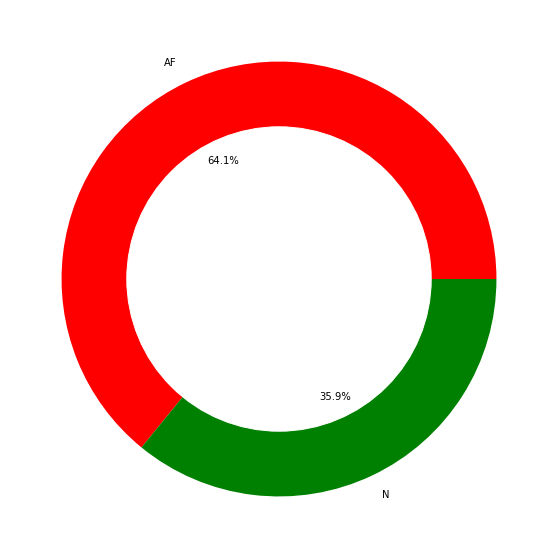

In [12]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=labels, 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- kita akan membuat seluruh class memiliki jumlah sample sebanyak 20000. 
- Sehingga untuk class `0` yang memiliki sample 72471, akan dilakukan pemilihan acak sebanyak 20000 dengan menggunakan Pandas Dataframe `.sample()`.
- Untuk class lainya, karena dibawah 20000 sample, akan diterapkan proses upsampling menjadi 20000 sample menggunakan sklearn `resample()`.

In [13]:
# sampling and resampling dataset

from sklearn.utils import resample
#n_samples = 1000 
random_states = [42, 123]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[600]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [14]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
115,-0.053077,0.044708,0.172579,0.311118,0.486242,0.697959,0.803793,0.693647,0.447397,0.231269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
144,0.864652,0.625520,0.309093,0.085379,-0.074335,0.024246,0.054327,0.033567,-0.013748,-0.005927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
87,-0.001891,0.156971,0.399748,0.575399,0.746260,0.888352,0.936939,0.712198,0.338783,0.037242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
48,0.209613,0.362156,0.570891,0.758098,0.846051,0.800199,0.596781,0.300543,0.017245,-0.110652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
119,0.139757,0.278456,0.498616,0.737905,0.895628,0.897460,0.762571,0.502935,0.200050,-0.045410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Sekarang kita memiliki dataset yang sudah balance.

In [15]:
# cek balanced dataset

equilibre=train_df[600].value_counts()

print(equilibre)

1    90
0    90
Name: 600, dtype: int64


## Understanding ECG Signal
- Sekarang kita ambil 1 sample tiap class untuk melihat profile heart beat masing-masing class.
- Ini berguna untuk kita agar dapat memahami karakteristik sinyal ECG untuk tiap class.
- Task ini mudah dilakukan menggunakan pandas,  `.groupby()` pada kolom 187 (kolom class) dan dengan menggunakan fungsi `.apply()` kita ambil 1 sample data menggunakan `.sample()`.

In [16]:
ECG_PER_CLASS =train_df.groupby(600,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [17]:
ECG_PER_CLASS

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
125,0.039915,0.084032,0.204793,0.41658,0.628286,0.784764,0.876416,0.848089,0.639828,0.328333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
81,0.153614,0.258329,0.430374,0.67724,0.856588,0.910977,0.817922,0.597385,0.304286,0.006024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


- Pertama kita plot tiap sample pada dataframe `ECG_PER_CLASS` menggunakan pandas `.plot()`.
- Setelah itu kita plot 2D histogram untuk keseluruhan sample ECG tiap class menggunakan fungsi `plot_hist()` yang kita buat dibawah.
- Pada plot histogram, daerah dengan intensitas lebih terang menandakan banyak titik sample pada waktu dan nilai ECG tersebut.
- Sebaliknya untuk daerah yang lebih gelap.

In [18]:
def plot_1_sample(class_number, fs=250):
    data = ECG_PER_CLASS.iloc[class_number,:600]
    times = np.arange(data.shape[0], dtype='float') / fs * 1000
    
    plt.plot(times, data)
    plt.title("Plot 1 sample in class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

In [19]:
def plot_hist(class_number, min_, size, fs=250):
    # filter data berdasarkan class_number 
    ECG=train_df.loc[train_df[600]==class_number].values
    
    # scale tm value (*1000) agar bisa ditampilkan dalam satuam (ms)
    tm = np.arange(ECG.shape[1], dtype='float') / fs * 1000
    
    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    times = np.tile(tm[min_:size], ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(times, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D histogram on class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

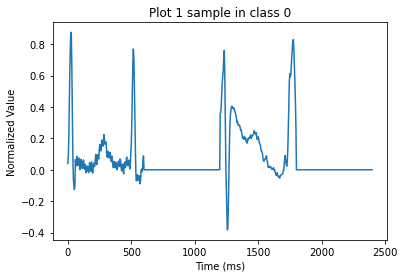

In [20]:
plot_1_sample(class_number=0)

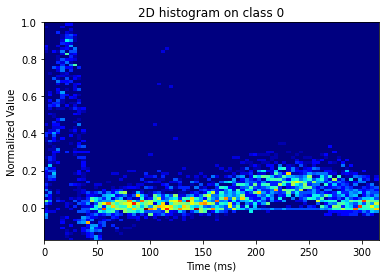

In [21]:
plot_hist(class_number=0, min_=0, size=80)

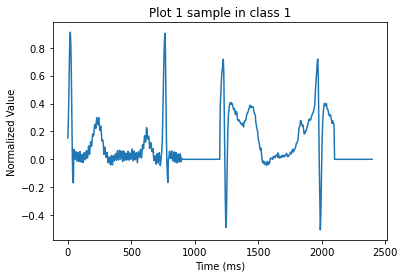

In [22]:
plot_1_sample(class_number=1)

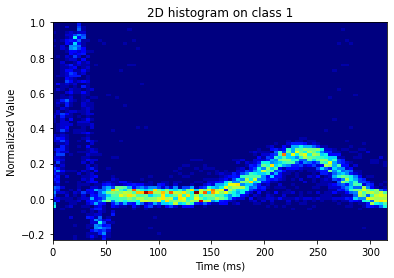

In [23]:
plot_hist(class_number=1, min_=0, size=80)

### Save Balanced Training Data and Test Data

In [24]:
train_df.to_csv(dataset_folder + "train_AFDB_%s_balanced.csv" % record, header=None, index=None)
test_df.to_csv(dataset_folder + "test_AFDB_%s.csv" % record, header=None, index=None)